# Compiling & Feature Engineering

Notebook to compile datasets for modeling and preliminary feature engineering.

## Problem Statement

Predict electricity prices in Spain for each hour of the upcoming day more accurately than estimates provided by the Spanish transmission agent and operator. 

Use information available during the 2pm-3pm window the previous day during which generators in Spain submit their bids. 

## Contents

- [Imports](#Imports)
- [Energy - Oil](#Energy---Oil)
- [Sationarity & Autocorrelation](#Sationarity-&-Autocorrelation)
- [Modeling Data Set](#Modeling-Data-Set)

### Imports

In [101]:
# General Imports
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px

# Time series imports
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

**Loading Previously Cleaned Data Sets**

In [34]:
# Load data sets
energy = pd.read_csv('../Data/intermediary/energy.csv')
oil = pd.read_csv('../Data/intermediary/oil_daily.csv')

**Energy**

In [35]:
energy.head(2)

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,...,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,diff,day_of_week,hour_of_day
0,2015-01-01 00:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2866.0,3,0
1,2015-01-01 01:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,3436.0,3,1


In [36]:
# Convert time to datetime
energy['time'] = pd.to_datetime(energy['time'])
# Make time the index
energy.set_index('time', inplace=True)
# Check results
energy.head(2)

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,generation_wind_onshore,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,diff,day_of_week,hour_of_day
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,6378.0,17.0,6436.0,26118.0,25385.0,50.1,65.41,2866.0,3,0
2015-01-01 01:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,5890.0,16.0,5856.0,24934.0,24382.0,48.1,64.92,3436.0,3,1


**Oil Prices**

In [37]:
oil.head(2)

,date,oil_price
0,2020-03-04,42.49694
1,2020-03-03,42.08195


In [38]:
# Convert date to datetime
oil['date'] = pd.to_datetime(oil['date'])
# Make time the index
oil.set_index('date', inplace=True)
# Check results
oil.head(2)

,oil_price
date,
2020-03-04,42.49694
2020-03-03,42.08195


**Weather**

*TBU*

### Energy - Oil 

We will first merge the energy and oil data sets as they will form the basis of our predictions. Weather will be added later.

In [48]:
# Create date column for merging on
energy['date'] = pd.to_datetime(energy.index.date)

In [49]:
energy['date'].dtype

dtype('<M8[ns]')

In [71]:
energy_oil_df = pd.merge(energy, oil, 
                         left_on='date', 
                         right_index=True,
                         how='left')

In [72]:
energy_oil_df.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,diff,day_of_week,hour_of_day,date,oil_price
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,6436.0,26118.0,25385.0,50.10,65.41,2866.0,3,0,2015-01-01,45.1353
2015-01-01 01:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,5856.0,24934.0,24382.0,48.10,64.92,3436.0,3,1,2015-01-01,45.1353
2015-01-01 02:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,5454.0,23515.0,22734.0,47.33,64.48,4062.0,3,2,2015-01-01,45.1353
2015-01-01 03:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,5151.0,22642.0,21286.0,42.27,59.32,3937.0,3,3,2015-01-01,45.1353
2015-01-01 04:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,4861.0,21785.0,20264.0,38.41,56.04,4356.0,3,4,2015-01-01,45.1353


In [73]:
energy_oil_df.shape

(35184, 25)

In [81]:
# unique index entries
energy_oil_df.index.nunique()

35064

Looks as though we have too many entries now, let's look for missing values and duplicates

In [74]:
# missing values
energy_oil_df.isnull().sum()

generation_biomass                              0
generation_fossil_brown_coal/lignite            0
generation_fossil_gas                           0
generation_fossil_hard_coal                     0
generation_fossil_oil                           0
generation_hydro_pumped_storage_consumption     0
generation_hydro_run-of-river_and_poundage      0
generation_hydro_water_reservoir                0
generation_nuclear                              0
generation_other                                0
generation_other_renewable                      0
generation_solar                                0
generation_waste                                0
generation_wind_onshore                         0
forecast_solar_day_ahead                        0
forecast_wind_onshore_day_ahead                 0
total_load_forecast                             0
total_load_actual                               0
price_day_ahead                                 0
price_actual                                    0


We are missing 48 values for oil_price. It seems likely that there are 2 days of missing oil prices. Let's take a closer look.

In [77]:
energy_oil_df.loc[energy_oil_df['oil_price'].isnull()]

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,diff,day_of_week,hour_of_day,date,oil_price
time,,,,,,,,,,,,,,,,,,,,,
2017-11-11 00:00:00+00:00,407.0,598.0,7198.0,5790.0,333.0,0.0,571.0,1222.0,5037.0,14.0,...,7670.0,26063.0,26618.0,61.84,66.72,2307.0,5,0,2017-11-11,NaN
2017-11-11 01:00:00+00:00,411.0,516.0,6324.0,5607.0,326.0,0.0,564.0,960.0,5037.0,14.0,...,7316.0,24574.0,24919.0,57.00,61.96,2589.0,5,1,2017-11-11,NaN
2017-11-11 02:00:00+00:00,406.0,406.0,6042.0,5490.0,324.0,0.0,558.0,754.0,5038.0,13.0,...,7351.0,23418.0,23740.0,55.48,60.15,3123.0,5,2,2017-11-11,NaN
2017-11-11 03:00:00+00:00,406.0,428.0,5223.0,5395.0,319.0,198.0,553.0,407.0,5040.0,15.0,...,7364.0,22806.0,23023.0,49.31,54.72,2730.0,5,3,2017-11-11,NaN
2017-11-11 04:00:00+00:00,406.0,410.0,4687.0,5279.0,321.0,412.0,538.0,286.0,5040.0,16.0,...,7391.0,22462.0,22673.0,47.02,51.95,2517.0,5,4,2017-11-11,NaN
2017-11-11 05:00:00+00:00,405.0,403.0,4672.0,5303.0,314.0,729.0,546.0,362.0,5040.0,17.0,...,7270.0,22416.0,22646.0,46.57,51.58,2885.0,5,5,2017-11-11,NaN
2017-11-11 06:00:00+00:00,408.0,422.0,5108.0,5306.0,311.0,346.0,543.0,242.0,5040.0,16.0,...,7379.0,23143.0,23238.0,47.65,53.01,2388.0,5,6,2017-11-11,NaN
2017-11-11 07:00:00+00:00,406.0,385.0,5254.0,5204.0,303.0,0.0,546.0,239.0,5040.0,16.0,...,7407.0,24438.0,24389.0,49.64,55.54,873.0,5,7,2017-11-11,NaN
2017-11-11 08:00:00+00:00,404.0,407.0,5366.0,5286.0,300.0,78.0,539.0,420.0,5041.0,16.0,...,7229.0,25743.0,25827.0,51.51,57.76,-11.0,5,8,2017-11-11,NaN


With the missing values being from only a 2 day period let's use the linear interpolation method. While this isn't perfect the time frame of missing values is not large and it will be consistent with how we have filled missing values elsewhere.

In [78]:
# interpolate missing values
energy_oil_df = energy_oil_df.interpolate(method='linear')

In [79]:
energy_oil_df['oil_price'].isnull().sum()

0

In [85]:
# duplicated index entries
energy_oil_df.index.duplicated(keep='first').sum()

120

120 is our expected number of duplicates and corresponds to 5 days of data, now we need to look at the duplicates to see what is going on.

In [91]:
energy_oil_df[energy_oil_df.duplicated(keep=False)]

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run-of-river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,forecast_wind_onshore_day_ahead,total_load_forecast,total_load_actual,price_day_ahead,price_actual,diff,day_of_week,hour_of_day,date,oil_price
time,,,,,,,,,,,,,,,,,,,,,
2017-04-02 00:00:00+00:00,351.0,195.0,3987.0,2657.0,265.0,1543.0,948.0,1126.0,7089.0,58.0,...,8999.0,25896.0,25618.0,34.96,49.23,2004.0,6,0,2017-04-02,47.429
2017-04-02 00:00:00+00:00,351.0,195.0,3987.0,2657.0,265.0,1543.0,948.0,1126.0,7089.0,58.0,...,8999.0,25896.0,25618.0,34.96,49.23,2004.0,6,0,2017-04-02,47.429
2017-04-02 01:00:00+00:00,342.0,201.0,3745.0,2655.0,266.0,1917.0,962.0,952.0,7048.0,57.0,...,9190.0,24328.0,24102.0,34.01,44.14,3596.0,6,1,2017-04-02,47.429
2017-04-02 01:00:00+00:00,342.0,201.0,3745.0,2655.0,266.0,1917.0,962.0,952.0,7048.0,57.0,...,9190.0,24328.0,24102.0,34.01,44.14,3596.0,6,1,2017-04-02,47.429
2017-04-02 02:00:00+00:00,336.0,186.0,3594.0,2564.0,260.0,2880.0,1016.0,987.0,6933.0,55.0,...,9654.0,23601.0,23467.0,31.93,44.35,5660.0,6,2,2017-04-02,47.429
2017-04-02 02:00:00+00:00,336.0,186.0,3594.0,2564.0,260.0,2880.0,1016.0,987.0,6933.0,55.0,...,9654.0,23601.0,23467.0,31.93,44.35,5660.0,6,2,2017-04-02,47.429
2017-04-02 03:00:00+00:00,324.0,177.0,3277.0,2205.0,264.0,3843.0,1066.0,647.0,6742.0,55.0,...,10564.0,23140.0,22839.0,31.89,43.32,6739.0,6,3,2017-04-02,47.429
2017-04-02 03:00:00+00:00,324.0,177.0,3277.0,2205.0,264.0,3843.0,1066.0,647.0,6742.0,55.0,...,10564.0,23140.0,22839.0,31.89,43.32,6739.0,6,3,2017-04-02,47.429
2017-04-02 04:00:00+00:00,324.0,178.0,3380.0,2054.0,264.0,4090.0,1068.0,688.0,6545.0,54.0,...,10767.0,23117.0,22890.0,32.09,42.95,6934.0,6,4,2017-04-02,47.429


It looks like we have doubled up all of April 2nd 2017. However, the data seems to be the same for each entry so we should be fine just dropping the last entry.

In [98]:
# Dropping duplicates
# thanks n8yoder & paulH
# https://stackoverflow.com/questions/13035764/remove-rows-with-duplicate-indices-pandas-dataframe-and-timeseries
energy_oil_df = energy_oil_df.loc[~energy_oil_df.index.duplicated(keep='first')]

In [99]:
energy_oil_df.shape

(35064, 25)

We've now merged the 2 data sets, let's first save to csv before exploring further.

In [100]:
energy_oil_df.to_csv('../Data/Analysis/energy_oil.csv')

### Sationarity & Autocorrelation 

For our time series models we need to consider stationarity and autocorrelation. From our previous eda we expect to see non-stationarity and a fair amount of autocorrelation as our data is definitely seasonal. However, due to the need to predict all 24 hours of data at 3pm the day before it will be difficult to account for stationarity and we will likely start out with a model that predicts prices directly.

In [102]:
# Code written by Joseph Nelson.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [104]:
interpret_dftest(adfuller(energy_oil_df['price_actual']))

Test Statistic   -9.147016e+00
p-value           2.750493e-15
dtype: float64

Surpringsingly with p-value of 2.75 E-15 we can reject the null hypothesis that price is not stationary, this is good news for our modeling.

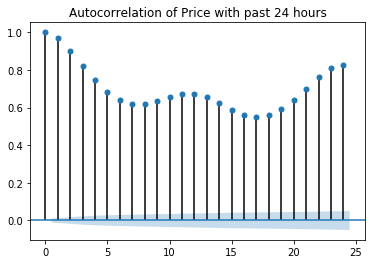

In [108]:
# Autocorrelation - look at one day
plot_acf(energy_oil_df['price_actual'], lags = 24, title='Autocorrelation of Price with past 24 hours');

We can see that the hours immediately preceding the hour in question and as we approach the previous day show the highest autocorrelation, this is in line with what we would expect given our EDA showing that prices fluctuate significantly thoughout the day.

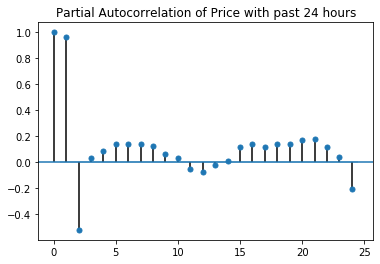

In [109]:
# Partial Autocorrelation - look at one day
plot_pacf(energy_oil_df['price_actual'], lags = 24, title='Partial Autocorrelation of Price with past 24 hours');

Showing the partial autocorrelation it seems as though all of the previous hours have some significance, though 1, 2 and 24 hours in the past show the most significance. 

Let's look farther back at a weeks worth of data.

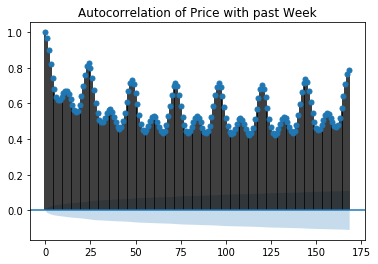

In [110]:
# Autocorrelation - look at one week
plot_acf(energy_oil_df['price_actual'], lags = 24*7, title='Autocorrelation of Price with past Week');

This is quite busy but shows the general trend of each 24 hours being quite correlated and looking back a whole week we see that one week in the past is more autocorrelated than any other time other than the previous couple hours and previous day. We will likely want to account for the weekly trends either through including the prices for a week past or through including the day of the week in the analysis.

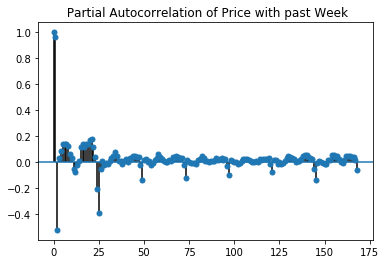

In [111]:
# Partial Autocorrelation - look at one week
plot_pacf(energy_oil_df['price_actual'], lags = 24*7, title=' Partial Autocorrelation of Price with past Week');

When looking at partial autocorrelation we still see that each day in the past has meaning but going back a week does not seem as important.

### Simplifying Data

For our initial analysis we are going to assume that we have access to the following data:
- forecasted load
- forecasted solar
- forecasted wind
- all past prices
- price forecast for the rest of the current day
- current oil prices
- All information related to what day it is

Since actual generation for various sources is determined by the auction it would be difficult to predict generation by source ahead of time. Thus we will stick to the variables we definitely have access too.

At a later point we will try incorporating weather forecasts into the model to improve performance.

In [112]:
energy_oil_df.columns

Index(['generation_biomass', 'generation_fossil_brown_coal/lignite',
       'generation_fossil_gas', 'generation_fossil_hard_coal',
       'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run-of-river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_nuclear',
       'generation_other', 'generation_other_renewable', 'generation_solar',
       'generation_waste', 'generation_wind_onshore',
       'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead',
       'total_load_forecast', 'total_load_actual', 'price_day_ahead',
       'price_actual', 'diff', 'day_of_week', 'hour_of_day', 'date',
       'oil_price'],
      dtype='object')

In [113]:
# desired columns
simple_cols = ['price_actual', 'price_day_ahead', 
               'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead',
               'total_load_forecast', 'oil_price',
               'day_of_week', 'hour_of_day', 'date']

In [114]:
energy_simple = energy_oil_df[simple_cols]
energy_simple.head(3)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date
time,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.10,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01
2015-01-01 01:00:00+00:00,64.92,48.10,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01
2015-01-01 02:00:00+00:00,64.48,47.33,8.0,5454.0,23515.0,45.1353,3,2,2015-01-01


In [115]:
energy_simple.to_csv('../Data/Analysis/energy_simple.csv')

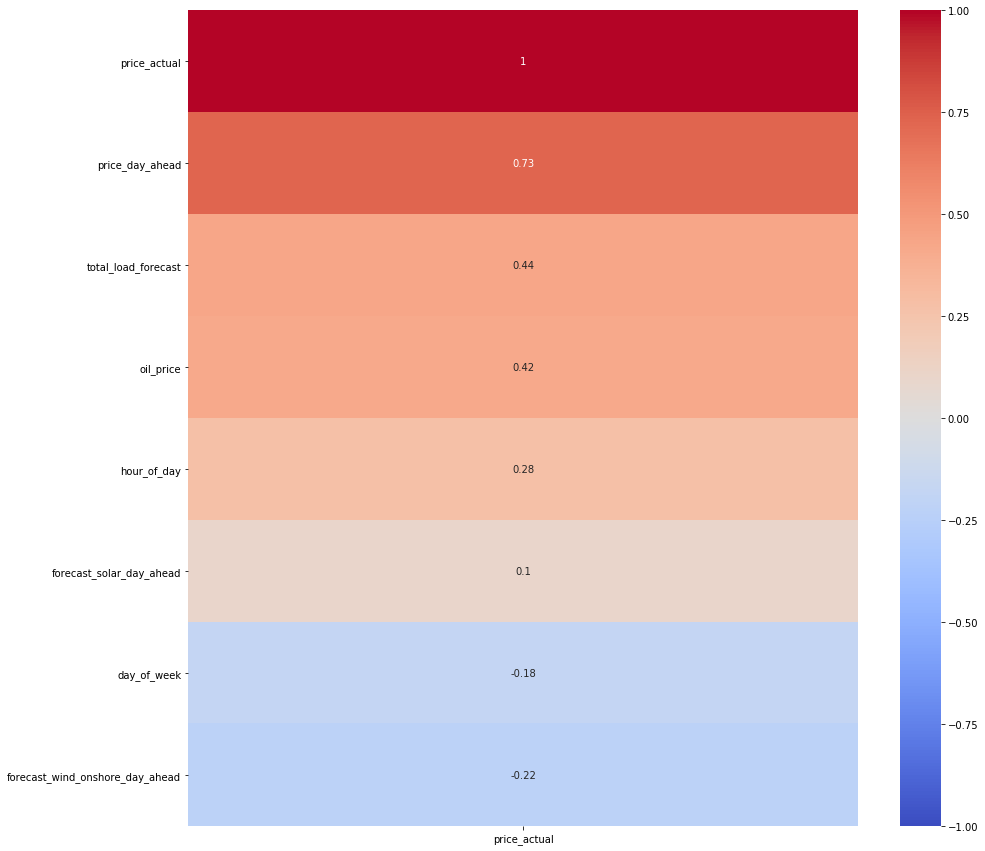

In [117]:
# take a look at the correlation between numerical columns and actual_price
plt.figure(figsize=(15,15))
sns.heatmap(energy_simple.corr()[['price_actual']].sort_values('price_actual', ascending = False), 
            annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1);

This is the same plot that we saw in our EDA of the energy data byt with oil price added in. It seems as though oil price is a decent indicator which is not surprising "since the price-setting power plant is often a fuel burning one (particularly during the peak) electricity price is particularly sensitive to fuel price movements" 

(See Econometric Models For the Anlysis of Electricity Markets p42 in the Research Folder)

We can see that while hour of the day and day of week are meaningful they should likely be turned into dummies as for the purpose of our analysis they are not ordered.

Additionally, for our day variables we would like to have the name of the day not the number as it will make our columns easier to understand.

In [129]:
# get day of week name
energy_simple['day'] = energy_simple.index.day_name()

/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
energy_simple.head(2)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date,day
time,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.1,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01,Thursday
2015-01-01 01:00:00+00:00,64.92,48.1,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01,Thursday


In [142]:
# make dummies for hour of day and day
energy_dummies = pd.get_dummies(energy_simple,
                               columns=['hour_of_day','day'],
                               prefix=['hour',None], 
                               drop_first=True)

Now let's look at the correlation again

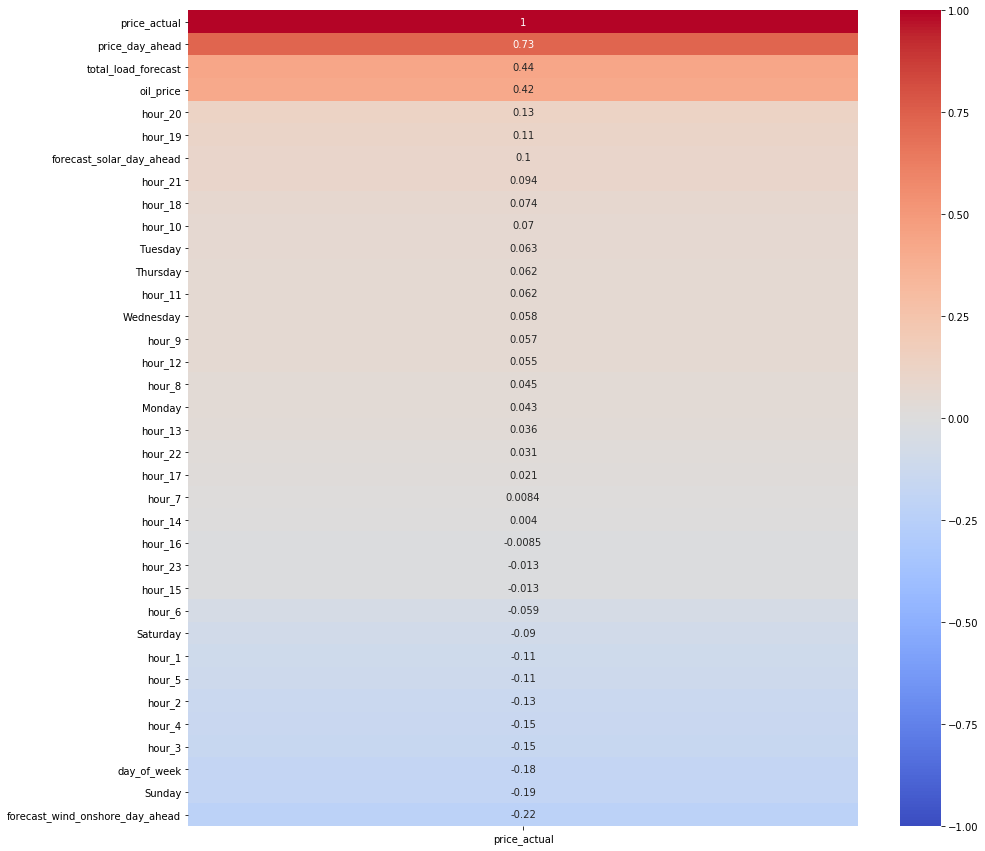

In [143]:
# take a look at the correlation between numerical columns and actual_price
plt.figure(figsize=(15,15))
sns.heatmap(energy_dummies.corr()[['price_actual']].sort_values('price_actual', ascending = False), 
            annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1);

We can see here that this has made each of the individual days / hours less meaningful than the single variables that were holding them previously. However, the fact that they are in a mized up order shows that they are definitely better off as dummies rather than ordinal variables.

Going forward we will be looking to predict all 24 hours of the day ahead before 3pm, so we will not have the hour variables but rather just predict at 3pm. In order to do so we will need to amend the data set so that we have the correct columns in place.

### Modeling Data Set

In order to model the data we need to create a new dataframe containg only the 2pm time slot for each day. This 2-3pm time period is when the auctions take place for next day generation in Spain so that is when we will make our predictions.  In order to do to this we will need to set up some naming conventions and move some data around. This process will go as follows:

*Naming & Data Conventions*
- Next day data (actual prices, total load forecast, wind forecast) will have a prefix of **t** (i.e. tomorrow)
- That days data (actual prices up to 2pm, next day prediction for rest of day) will have prefix of **d** (i.e. day)
- Previous day data (actual prices) will have prefix of **y** (i.e. yesterday)
- Data that corresponds to the whole day (day of week, oil price) will not have any name change

We will need to make our transformations to the entire data set and then drop the observations we don't want (i.e. all that are not from the 2pm time slot).

In [146]:
# rename df
modeling_df = energy_oil_df[simple_cols]
modeling_df.head(2)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date
time,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.1,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01
2015-01-01 01:00:00+00:00,64.92,48.1,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01


**Day Ahead Variables**

In [147]:
# get day of week name
modeling_df['day'] = modeling_df.index.day_name()

/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [152]:
# get price actuals from day ahead
# need all 24 starting at 10 time periods ahead i.e. midnight
# set up iterators
times = [i for i in range(0,24)]
day_ahead_shifts = [i for i in range(-10,-34,-1)]
# loop through shifts to create columns
for s, t in zip(day_ahead_shifts,times):
    modeling_df['t_price_'+str(t)] = modeling_df['price_actual'].shift(s)

/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
modeling_df.head(50)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date,day,...,t_price_14,t_price_15,t_price_16,t_price_17,t_price_18,t_price_19,t_price_20,t_price_21,t_price_22,t_price_23
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.10,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01,Thursday,...,64.02,58.46,54.70,54.91,53.07,54.23,58.22,67.55,70.33,71.26
2015-01-01 01:00:00+00:00,64.92,48.10,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01,Thursday,...,58.46,54.70,54.91,53.07,54.23,58.22,67.55,70.33,71.26,75.86
2015-01-01 02:00:00+00:00,64.48,47.33,8.0,5454.0,23515.0,45.1353,3,2,2015-01-01,Thursday,...,54.70,54.91,53.07,54.23,58.22,67.55,70.33,71.26,75.86,73.65
2015-01-01 03:00:00+00:00,59.32,42.27,2.0,5151.0,22642.0,45.1353,3,3,2015-01-01,Thursday,...,54.91,53.07,54.23,58.22,67.55,70.33,71.26,75.86,73.65,74.19
2015-01-01 04:00:00+00:00,56.04,38.41,9.0,4861.0,21785.0,45.1353,3,4,2015-01-01,Thursday,...,53.07,54.23,58.22,67.55,70.33,71.26,75.86,73.65,74.19,71.51
2015-01-01 05:00:00+00:00,53.63,35.72,4.0,4617.0,21441.0,45.1353,3,5,2015-01-01,Thursday,...,54.23,58.22,67.55,70.33,71.26,75.86,73.65,74.19,71.51,71.04
2015-01-01 06:00:00+00:00,51.73,35.13,3.0,4276.0,21285.0,45.1353,3,6,2015-01-01,Thursday,...,58.22,67.55,70.33,71.26,75.86,73.65,74.19,71.51,71.04,71.24
2015-01-01 07:00:00+00:00,51.43,36.22,12.0,3994.0,21545.0,45.1353,3,7,2015-01-01,Thursday,...,67.55,70.33,71.26,75.86,73.65,74.19,71.51,71.04,71.24,70.64
2015-01-01 08:00:00+00:00,48.98,32.40,39.0,3602.0,21443.0,45.1353,3,8,2015-01-01,Thursday,...,70.33,71.26,75.86,73.65,74.19,71.51,71.04,71.24,70.64,72.85


Looks as though that was a success, now let's get the day ahead load prediction.

In [155]:
for s, t in zip(day_ahead_shifts,times):
    modeling_df['t_pred_load_'+str(t)] = modeling_df['total_load_forecast'].shift(s)

In [156]:
## and wind generation
for s, t in zip(day_ahead_shifts,times):
    modeling_df['t_pred_wind_'+str(t)] = modeling_df['forecast_wind_onshore_day_ahead'].shift(s)

**Today Variables**

We are assuming that the predicted price is the agreed upon price from the previous auction and as such we would have access to that for the full day, though we would know the actual prices for the hours up to 2pm. Thus we will need to gather the actual prices for the 14 preceding hours and the predicted price for the 9 following hours.

In [157]:
modeling_df['price_actual'].shift(0)

time
2015-01-01 00:00:00+00:00    65.41
2015-01-01 01:00:00+00:00    64.92
2015-01-01 02:00:00+00:00    64.48
2015-01-01 03:00:00+00:00    59.32
2015-01-01 04:00:00+00:00    56.04
                             ...  
2018-12-31 19:00:00+00:00    77.02
2018-12-31 20:00:00+00:00    76.16
2018-12-31 21:00:00+00:00    74.30
2018-12-31 22:00:00+00:00    69.89
2018-12-31 23:00:00+00:00    69.88
Name: price_actual, Length: 35064, dtype: float64

In [160]:
# Actual Prices
# set up iterators
d_act_times = [i for i in range(14,-1,-1)]
d_act_shifts = [i for i in range(0,15)]
# loop through shifts to create columns
for s, t in zip(d_act_shifts,d_act_times):
    modeling_df['d_price_'+str(t)] = modeling_df['price_actual'].shift(s)

In [163]:
modeling_df.head(15)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date,day,...,d_price_9,d_price_8,d_price_7,d_price_6,d_price_5,d_price_4,d_price_3,d_price_2,d_price_1,d_price_0
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.10,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,64.92,48.10,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00+00:00,64.48,47.33,8.0,5454.0,23515.0,45.1353,3,2,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00+00:00,59.32,42.27,2.0,5151.0,22642.0,45.1353,3,3,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00+00:00,56.04,38.41,9.0,4861.0,21785.0,45.1353,3,4,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 05:00:00+00:00,53.63,35.72,4.0,4617.0,21441.0,45.1353,3,5,2015-01-01,Thursday,...,65.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 06:00:00+00:00,51.73,35.13,3.0,4276.0,21285.0,45.1353,3,6,2015-01-01,Thursday,...,64.92,65.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 07:00:00+00:00,51.43,36.22,12.0,3994.0,21545.0,45.1353,3,7,2015-01-01,Thursday,...,64.48,64.92,65.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 08:00:00+00:00,48.98,32.40,39.0,3602.0,21443.0,45.1353,3,8,2015-01-01,Thursday,...,59.32,64.48,64.92,65.41,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
# Predicted prices
# set up iterators
d_pred_times = [i for i in range(15,24)]
d_pred_shifts = [i for i in range(-1,-10,-1)]
# loop through shifts to create columns
for s, t in zip(d_pred_shifts,d_pred_times):
    modeling_df['d_price_pred_'+str(t)] = modeling_df['price_day_ahead'].shift(s)

In [172]:
modeling_df.head(24)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date,day,...,d_price_0,d_price_pred_15,d_price_pred_16,d_price_pred_17,d_price_pred_18,d_price_pred_19,d_price_pred_20,d_price_pred_21,d_price_pred_22,d_price_pred_23
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.10,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01,Thursday,...,NaN,48.10,47.33,42.27,38.41,35.72,35.13,36.22,32.40,36.60
2015-01-01 01:00:00+00:00,64.92,48.10,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01,Thursday,...,NaN,47.33,42.27,38.41,35.72,35.13,36.22,32.40,36.60,43.10
2015-01-01 02:00:00+00:00,64.48,47.33,8.0,5454.0,23515.0,45.1353,3,2,2015-01-01,Thursday,...,NaN,42.27,38.41,35.72,35.13,36.22,32.40,36.60,43.10,45.14
2015-01-01 03:00:00+00:00,59.32,42.27,2.0,5151.0,22642.0,45.1353,3,3,2015-01-01,Thursday,...,NaN,38.41,35.72,35.13,36.22,32.40,36.60,43.10,45.14,45.14
2015-01-01 04:00:00+00:00,56.04,38.41,9.0,4861.0,21785.0,45.1353,3,4,2015-01-01,Thursday,...,NaN,35.72,35.13,36.22,32.40,36.60,43.10,45.14,45.14,47.35
2015-01-01 05:00:00+00:00,53.63,35.72,4.0,4617.0,21441.0,45.1353,3,5,2015-01-01,Thursday,...,NaN,35.13,36.22,32.40,36.60,43.10,45.14,45.14,47.35,47.35
2015-01-01 06:00:00+00:00,51.73,35.13,3.0,4276.0,21285.0,45.1353,3,6,2015-01-01,Thursday,...,NaN,36.22,32.40,36.60,43.10,45.14,45.14,47.35,47.35,43.61
2015-01-01 07:00:00+00:00,51.43,36.22,12.0,3994.0,21545.0,45.1353,3,7,2015-01-01,Thursday,...,NaN,32.40,36.60,43.10,45.14,45.14,47.35,47.35,43.61,44.91
2015-01-01 08:00:00+00:00,48.98,32.40,39.0,3602.0,21443.0,45.1353,3,8,2015-01-01,Thursday,...,NaN,36.60,43.10,45.14,45.14,47.35,47.35,43.61,44.91,48.10


We have now succesfully set up the data for the day in question.

**Yesterday Variables**

In [176]:
# Actual Prices
# set up iterators
y_act_times = [i for i in range(23,-1,-1)]
y_act_shifts = [i for i in range(15,39)]
# loop through shifts to create columns
for s, t in zip(y_act_shifts,y_act_times):
    modeling_df['y_price_'+str(t)] = modeling_df['price_actual'].shift(s)

In [177]:
modeling_df.head(50)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date,day,...,y_price_0,y_price_23,y_price_22,y_price_21,y_price_20,y_price_19,y_price_18,y_price_17,y_price_16,y_price_15
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.10,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00+00:00,64.92,48.10,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00+00:00,64.48,47.33,8.0,5454.0,23515.0,45.1353,3,2,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00+00:00,59.32,42.27,2.0,5151.0,22642.0,45.1353,3,3,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00+00:00,56.04,38.41,9.0,4861.0,21785.0,45.1353,3,4,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 05:00:00+00:00,53.63,35.72,4.0,4617.0,21441.0,45.1353,3,5,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 06:00:00+00:00,51.73,35.13,3.0,4276.0,21285.0,45.1353,3,6,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 07:00:00+00:00,51.43,36.22,12.0,3994.0,21545.0,45.1353,3,7,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 08:00:00+00:00,48.98,32.40,39.0,3602.0,21443.0,45.1353,3,8,2015-01-01,Thursday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This was succesful, now let's drop the unused columns and create a dummy for day. 

In [179]:
modeling_df = pd.get_dummies(modeling_df,
                               columns=['day'],
                               prefix=[None], 
                               drop_first=True)

,price_actual,price_day_ahead,forecast_solar_day_ahead,forecast_wind_onshore_day_ahead,total_load_forecast,oil_price,day_of_week,hour_of_day,date,t_price_0,...,y_price_18,y_price_17,y_price_16,y_price_15,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.41,50.10,17.0,6436.0,26118.0,45.1353,3,0,2015-01-01,58.94,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2015-01-01 01:00:00+00:00,64.92,48.10,16.0,5856.0,24934.0,45.1353,3,1,2015-01-01,59.86,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2015-01-01 02:00:00+00:00,64.48,47.33,8.0,5454.0,23515.0,45.1353,3,2,2015-01-01,60.12,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2015-01-01 03:00:00+00:00,59.32,42.27,2.0,5151.0,22642.0,45.1353,3,3,2015-01-01,62.05,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2015-01-01 04:00:00+00:00,56.04,38.41,9.0,4861.0,21785.0,45.1353,3,4,2015-01-01,62.06,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0


In [181]:
# Columns to drop
drop_cols = ['price_actual', 'price_day_ahead', 
             'forecast_solar_day_ahead', 'forecast_wind_onshore_day_ahead', 
             'total_load_forecast', 'day_of_week']

modeling_df.drop(columns=drop_cols, inplace=True)

In [183]:
final_model_df = modeling_df[modeling_df['hour_of_day'] == 14]

In [184]:
final_model_df.head()

,oil_price,hour_of_day,date,t_price_0,t_price_1,t_price_2,t_price_3,t_price_4,t_price_5,t_price_6,...,y_price_18,y_price_17,y_price_16,y_price_15,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 14:00:00+00:00,45.1353,14,2015-01-01,64.02,58.46,54.70,54.91,53.07,54.23,58.22,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2015-01-02 14:00:00+00:00,43.8585,14,2015-01-02,66.82,63.35,58.79,57.44,55.29,56.22,58.13,...,74.26,64.74,61.18,59.76,0,0,0,0,0,0
2015-01-03 14:00:00+00:00,43.8585,14,2015-01-03,55.22,50.54,48.68,48.02,47.06,46.79,47.63,...,82.55,72.85,70.64,71.24,0,1,0,0,0,0
2015-01-04 14:00:00+00:00,43.7237,14,2015-01-04,70.77,64.89,60.91,59.68,58.04,59.57,69.73,...,71.50,66.69,62.03,62.76,0,0,1,0,0,0
2015-01-05 14:00:00+00:00,41.9574,14,2015-01-05,71.48,64.76,60.22,57.14,53.94,53.43,56.68,...,71.98,61.12,52.15,52.07,1,0,0,0,0,0


In [185]:
final_model_df.shape

(1461, 129)

Let's drop the na's then save to a csv and begin modelling.

In [187]:
final_model_df.dropna(inplace=True)
final_model_df.shape

/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(1459, 129)

In [188]:
final_model_df.to_csv('../Data/Analysis/model_data.csv')